In [1]:
# Importing the required libraries
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating the Gym environment with FrozenLake-v0 for stochastic environment
env = gym.make('FrozenLake-v0')

In [3]:
# Fetching the number of states and actions
number_of_states = env.observation_space.n
number_of_actions = env.action_space.n

In [4]:
# checking the total number of states and action
print('Total number of States : {}'.format(number_of_states)) 
print('Total number of Actions : {}'.format(number_of_actions))

Total number of States : 16
Total number of Actions : 4


In [5]:
# Creation of Q table
Q_TABLE = np.zeros([number_of_states, number_of_actions])

In [6]:
# Looking at the initial values Q table
print(Q_TABLE)
print('shape of Q table : {}'.format(Q_TABLE.shape))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
shape of Q table : (16, 4)


In [7]:
# Setting the Hyper parameter Values for Q Learning

NUMBER_OF_EPISODES = 10000
MAX_STEPS = 100 
LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.99

EGREEDY = 1
MAX_EGREEDY = 1
MIN_EGREEDY = 0.01
EGREEDY_DECAY_RATE = 0.001

In [8]:
# Creating empty lists to store rewards of all episodes
rewards_all_episodes = []
# Creating empty lists to store egeedy_values of all episodes
egreedy_values = []

In [9]:
for episode in range(NUMBER_OF_EPISODES):
    
    state = env.reset()
    done = False

    current_episode_rewards = 0

    for step in range(MAX_STEPS):
     
        random_for_egreedy = np.random.rand()
        
        if random_for_egreedy > EGREEDY:      
            action = np.argmax(Q_TABLE[state,:])
        else:
            action = env.action_space.sample()
            
        new_state, reward, done, info = env.step(action)

        Q_TABLE[state, action] = (1 - LEARNING_RATE) * Q_TABLE[state, action] \
            + LEARNING_RATE * (reward + DISCOUNT_FACTOR * np.max(Q_TABLE[new_state,:]))
        
        state = new_state
        current_episode_rewards += reward

        if done:
            break
    egreedy_values.append(EGREEDY)

    EGREEDY = MIN_EGREEDY + \
        (MAX_EGREEDY - MIN_EGREEDY) * np.exp(-EGREEDY_DECAY_RATE*episode)
    
    rewards_all_episodes.append(current_episode_rewards)

In [10]:
def rewards_split(rewards_all_episodes , total_episodes , split):
    """
    Objective:
    To split and caculate average reward or percentage of completed rewards per splits
    inputs: 
    rewards_all_episodes - all the per episode rewards
    total_episodes - total of episodes
    split - number of splits on which we will check the reward
    returns:
    average reward of percentage of completed rewards per splits
    """
    splitted = np.split(np.array(rewards_all_episodes),total_episodes/split)
    avg_reward_per_splits = []
    for rewards in splitted:
        avg_reward_per_splits.append(sum(rewards)/split)
    return avg_reward_per_splits

In [11]:
avg_reward_per_splits = rewards_split(rewards_all_episodes , NUMBER_OF_EPISODES , 1000)

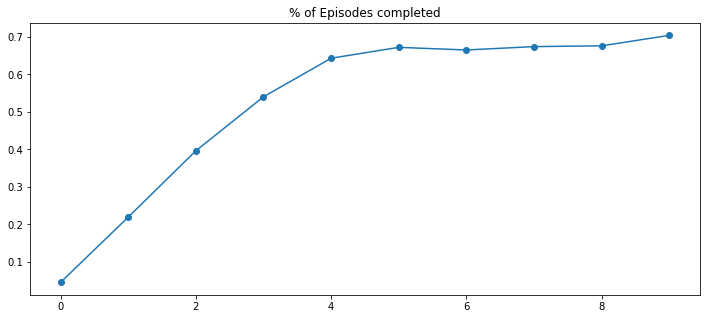

In [12]:
plt.figure(figsize=(12,5))
plt.title("% of Episodes completed")
plt.plot(np.arange(len(avg_reward_per_splits)), avg_reward_per_splits, 'o-')
plt.show()

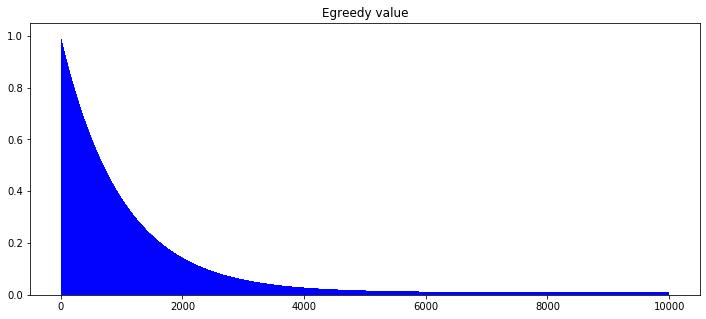

In [13]:
plt.figure(figsize=(12,5))
plt.title("Egreedy value")
plt.bar(np.arange(len(egreedy_values)), egreedy_values, alpha=0.6, color='blue', width=5)
plt.show()